<a href="https://colab.research.google.com/github/Chiragjain2525/Google-Colab-Code/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load dataset
df = pd.read_excel("EastWestAirlines.xlsx")
data, _ = make_blobs(n_samples=500, centers=5, random_state=42)
df

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


In [ ]:
print (df.head())

   Feature1  Feature2  KMeans_Cluster  Hierarchical_Cluster  DBSCAN_Cluster
0  4.627632  1.075915               3                     2               0
1  1.932565  5.601569               4                     2               0
2  0.741996  5.033909               4                     2               0
3  1.398611  0.948782               4                     2               0
4 -8.750419 -7.231623               1                     1               1


In [ ]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Feature1              500 non-null    float64
 1   Feature2              500 non-null    float64
 2   KMeans_Cluster        500 non-null    int32  
 3   Hierarchical_Cluster  500 non-null    int32  
 4   DBSCAN_Cluster        500 non-null    int64  
dtypes: float64(2), int32(2), int64(1)
memory usage: 15.8 KB
None


In [ ]:
# Convert data into a DataFrame
df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])


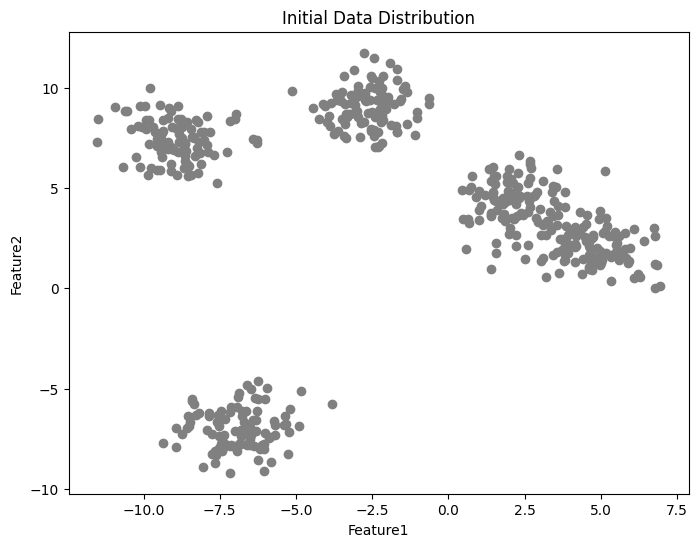

In [ ]:
# Visualize the data distribution
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature1'], df['Feature2'], c='gray', marker='o')
plt.title('Initial Data Distribution')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()


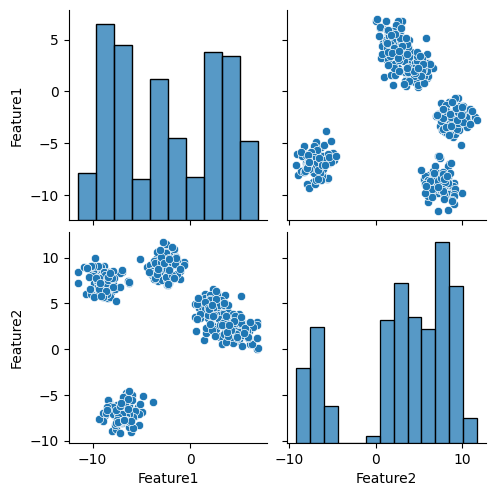

In [ ]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

sns.pairplot(df)
plt.show()

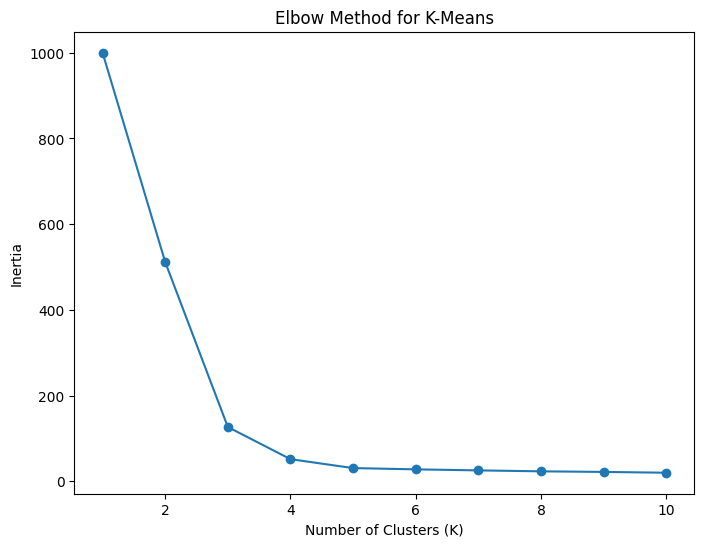

In [ ]:
# Apply K-Means Clustering
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Fit K-Means with optimal K
kmeans = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)


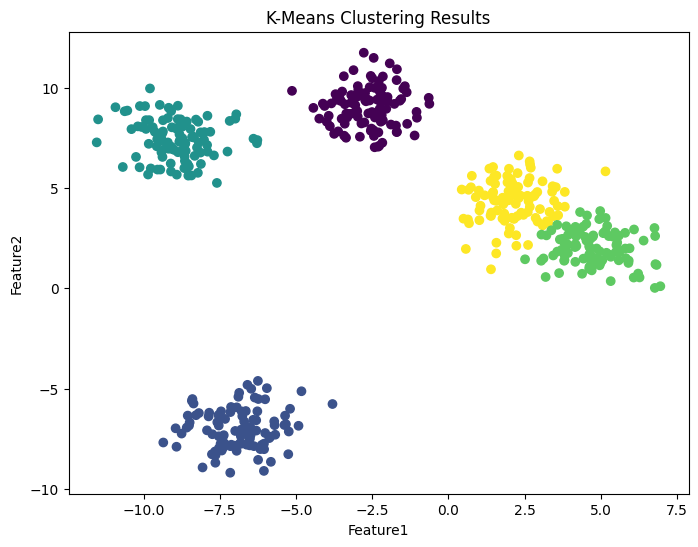

In [ ]:
# Visualizing the K-Means Clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature1'], df['Feature2'], c=df['KMeans_Cluster'], cmap='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

In [ ]:
# Evaluate K-Means using silhouette score
silhouette_kmeans = silhouette_score(df_scaled, df['KMeans_Cluster'])
print(f'Silhouette Score for K-Means: {silhouette_kmeans:.3f}')


Silhouette Score for K-Means: 0.681


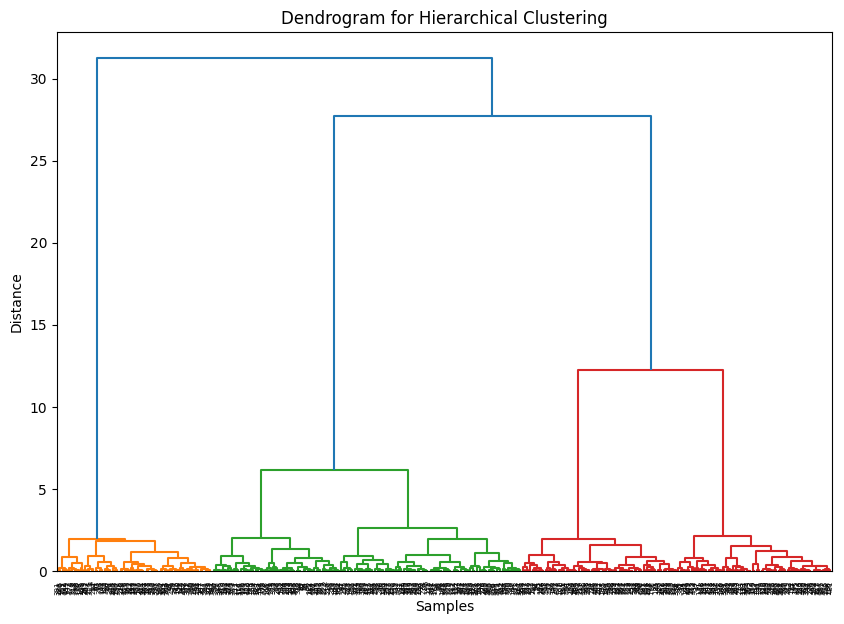

In [ ]:
# Apply Hierarchical Clustering
Z = linkage(df_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Choose a threshold for the hierarchical clustering
threshold = 10
df['Hierarchical_Cluster'] = fcluster(Z, threshold, criterion='distance')


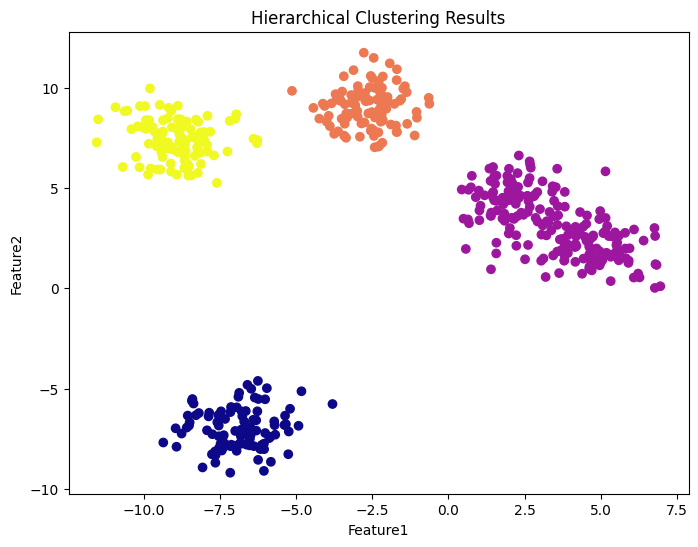

In [ ]:
# Visualizing Hierarchical Clustering results
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature1'], df['Feature2'], c=df['Hierarchical_Cluster'], cmap='plasma')
plt.title('Hierarchical Clustering Results')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

In [ ]:
# Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)


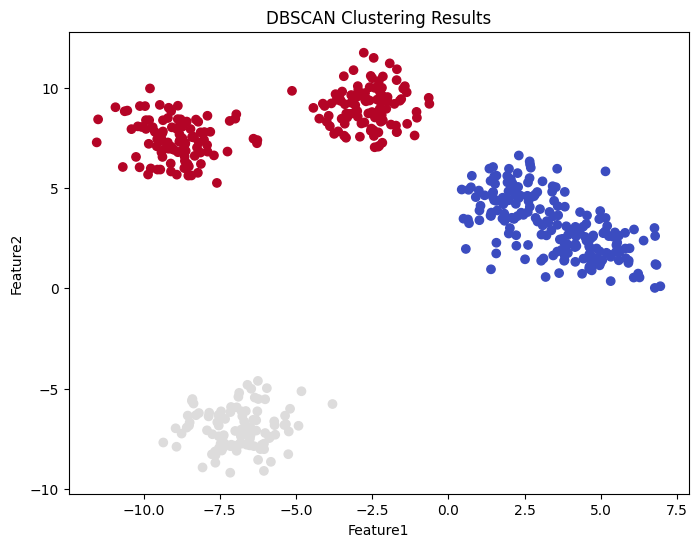

In [ ]:
# Visualizing DBSCAN Clustering Results
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature1'], df['Feature2'], c=df['DBSCAN_Cluster'], cmap='coolwarm')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

In [ ]:
array=df.values

In [ ]:
array

array([[ 4.62763206,  1.07591531,  3.        ,  2.        ],
       [ 1.93256454,  5.60156877,  4.        ,  2.        ],
       [ 0.74199584,  5.03390888,  4.        ,  2.        ],
       ...,
       [-6.83110556, -7.71105971,  1.        ,  1.        ],
       [ 3.92457513,  2.65276743,  3.        ,  2.        ],
       [-9.09791911,  5.82037996,  2.        ,  4.        ]])

In [ ]:
Stscaler = StandardScaler().fit(array)
X = Stscaler.transform(array)

In [ ]:
X

array([[ 1.31565015, -0.36350073,  0.70710678, -0.39223227],
       [ 0.80443082,  0.42877801,  1.41421356, -0.39223227],
       [ 0.57859539,  0.32940123,  1.41421356, -0.39223227],
       ...,
       [-0.85792366, -1.90178322, -0.70710678, -1.37281295],
       [ 1.18228937, -0.08745078,  0.70710678, -0.39223227],
       [-1.28790876,  0.46708396,  0.        ,  1.56892908]])

In [ ]:
dbscan.labels_

array([0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 3, 3, 0, 3, 1, 0, 0, 3,
       1, 3, 2, 3, 2, 3, 1, 0, 2, 2, 2, 0, 0, 2, 3, 0, 3, 2, 3, 0, 2, 3,
       2, 1, 2, 3, 1, 1, 1, 2, 0, 0, 0, 0, 0, 3, 3, 1, 1, 2, 0, 1, 2, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 1, 1, 2, 0, 3, 1, 3, 0, 0,
       2, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 1, 1,
       0, 2, 0, 0, 1, 0, 3, 3, 1, 0, 3, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 3,
       0, 3, 0, 3, 1, 0, 0, 0, 1, 1, 3, 1, 1, 3, 0, 1, 3, 0, 3, 0, 2, 2,
       2, 3, 0, 0, 1, 2, 0, 2, 1, 3, 3, 1, 3, 0, 0, 3, 0, 0, 3, 0, 1, 0,
       2, 2, 1, 0, 2, 2, 1, 0, 3, 2, 1, 2, 2, 0, 0, 0, 0, 2, 3, 3, 3, 0,
       3, 0, 0, 2, 2, 3, 0, 2, 2, 3, 0, 0, 1, 0, 3, 0, 0, 0, 3, 3, 1, 2,
       2, 3, 2, 0, 2, 0, 0, 2, 3, 0, 0, 2, 2, 0, 1, 0, 3, 1, 2, 1, 3, 3,
       2, 1, 0, 0, 1, 3, 2, 0, 0, 1, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0,
       2, 3, 1, 0, 2, 0, 3, 2, 2, 0, 0, 2, 2, 2, 0, 0, 3, 2, 1, 0, 2, 3,
       0, 1, 0, 0, 1, 3, 2, 2, 0, 3, 0, 3, 1, 3, 0,

In [ ]:
cl=pd.DataFrame(dbscan.labels_,columns=['DBSCAN_Cluster'])

In [ ]:
cl

,DBSCAN_Cluster
0,0
1,0
2,0
3,0
4,1
...,...
495,2
496,3
497,1
498,0


In [ ]:
pd.concat([df,cl],axis=1)

,Feature1,Feature2,KMeans_Cluster,Hierarchical_Cluster,DBSCAN_Cluster
0,4.627632,1.075915,3,2,0
1,1.932565,5.601569,4,2,0
2,0.741996,5.033909,4,2,0
3,1.398611,0.948782,4,2,0
4,-8.750419,-7.231623,1,1,1
...,...,...,...,...,...
495,-1.043549,8.788510,0,3,2
496,-8.205920,8.296077,2,4,3
497,-6.831106,-7.711060,1,1,1
498,3.924575,2.652767,3,2,0


In [ ]:
import sklearn
sklearn.metrics.silhouette_score(X,dbscan.labels_)

0.8377508209553397

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
neigh=NearestNeighbors(n_neighbors=12)
nbrs=neigh.fit(X)
distances,indices=nbrs.kneighbors(X)

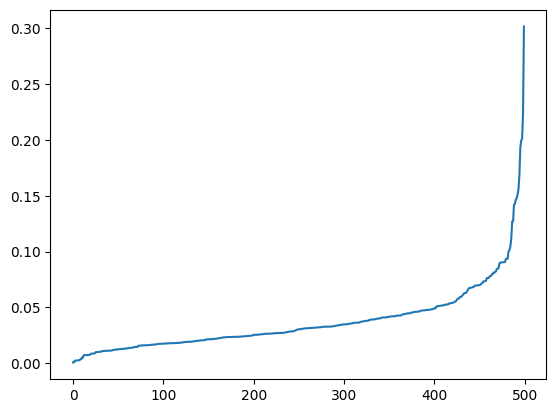

In [ ]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)

In [ ]:
#  Evaluate DBSCAN using silhouette score
silhouette_dbscan = silhouette_score(df_scaled, df['DBSCAN_Cluster'])
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan:.3f}')

Silhouette Score for DBSCAN: 0.707


In [ ]:
#  Cluster Analysis and Interpretation
print("Cluster Centers for K-Means:")
print(kmeans.cluster_centers_)


Cluster Centers for K-Means:
[[-0.06366026  1.03090423]
 [-0.86737536 -1.77642819]
 [-1.2540179   0.74180127]
 [ 1.33762176 -0.20271625]
 [ 0.84248035  0.21057182]]


In [ ]:
# Interpreting the cluster characteristics
print("Cluster Sizes for DBSCAN:")
unique, counts = np.unique(df['DBSCAN_Cluster'], return_counts=True)
for cluster_id, count in zip(unique, counts):
    print(f"Cluster {cluster_id}: {count} points")

Cluster Sizes for DBSCAN:
Cluster 0: 200 points
Cluster 1: 100 points
Cluster 2: 200 points


   Feature1  Feature2  KMeans_Cluster  Hierarchical_Cluster  DBSCAN_Cluster
0  4.627632  1.075915               3                     2               0
1  1.932565  5.601569               4                     2               0
2  0.741996  5.033909               4                     2               0
3  1.398611  0.948782               4                     2               0
4 -8.750419 -7.231623               1                     1               1
